<a href="https://colab.research.google.com/github/ethelcht/bwa-u4-feature-request/blob/master/Creating_npy_and_csv_files_for_training_and_testing_32x32.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount Google Drive and Import neccesary libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os, sys

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'INM363 Individual Project/Melanoma Data' 
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['ISIC_2020_Training_GroundTruth.csv', 'ISIC_2020_Test_Metadata.csv', 'train_data_processed_partially_labelled.csv', 'train_data_processed.csv', 'test_data_processed.csv', 'test-1', 'train-1', 'test', 'train', 'working', 'tfrecords', '.ipynb_checkpoints', 'Train_np', 'Test_np', 'numpy_target.pkl', 'numpy_image_test.pkl', 'numpy_train.pkl', 'x_test_128.npy', 'x_train_128.npy', 'x_train_32.npy', 'x_test_32.npy', 'ISIC_2020_Training_GroundTruth.gsheet', 'For training EfficientNet', 'targets.csv', 'train_X_NPY.npy', 'test_X_NPY.npy', 'studentModel3.h5', 'studentModel4.h5', 'y_train_student2.npy', 'x_train_student2.npy', 'train-1024', 'test-1024', 'train-384', 'test-384']


In [ ]:
import numpy as np 
import pandas as pd

In [ ]:
from subprocess import check_output

In [ ]:
from PIL import Image
from IPython.display import display
from IPython.display import Image as _Imgdis

In [ ]:
from scipy import ndimage
from keras_preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [ ]:
import matplotlib.pyplot as plt  

Reference: https://www.kaggle.com/code/lgmoneda/from-image-files-to-numpy-arrays/notebook

Ready to convert images from jpeg to npy

In [ ]:
folder = "/content/drive/MyDrive/INM363 Individual Project/Melanoma Data/train"

In [ ]:
files = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

Number of images
Eamples: 
ISIC_9751601.jpg


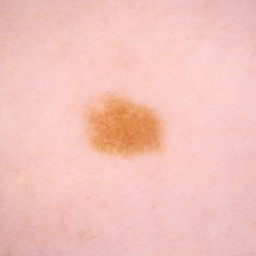

ISIC_9736710.jpg


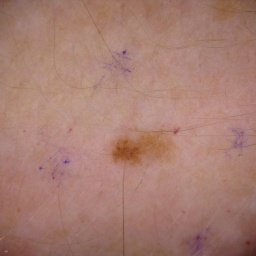

In [ ]:
print("Number of images".format(len(files)))
print("Eamples: ")

for i in range(100, 102):
    print(files[i])
    display(_Imgdis(filename=folder + "/" + files[i], width=500, height=500))

In [ ]:
train_files = []
y_train = []
i=0
for _file in files:
    train_files.append(_file)
    label_in_file = _file.find("_")
    y_train.append((_file[0:label_in_file]))

print("Files in train_files: %d" % len(train_files))

# Original Dimensions of the images
image_width = 32
image_height = 32

channels = 3
nb_classes = 2

dataset = np.ndarray(shape=(len(train_files), image_height, image_width, channels),
                     dtype=np.float32)


dataset = np.round(dataset).astype(int) # round the number and cast the data type as integer


i = 0
for _file in train_files:
    img = load_img(folder + "/" + _file)  # this is a PIL image
    img.thumbnail((image_width, image_height))
    # Convert to numpy Array
    x = img_to_array(img)

    dataset[i] = x
    i += 1
    if i % 33126 == 0:
        print("%d images to array" % i)
print("All images to array!")

Files in train_files: 33126
33126 images to array
All images to array!


In [ ]:
np.save('/content/drive/MyDrive/INM363 Individual Project/Melanoma Data/x_train_32.npy', dataset) # Save the file in google drive for training purpose

Inspect the numpy file

In [ ]:
X_train = np.load('/content/drive/MyDrive/INM363 Individual Project/Melanoma Data/x_train_32.npy')

In [ ]:
X_train.shape

(33126, 32, 32, 3)

In [ ]:
X_train

array([[[[0.7411765 , 0.47843137, 0.43137255],
         [0.75686276, 0.49411765, 0.44313726],
         [0.7529412 , 0.49803922, 0.44313726],
         ...,
         [0.7921569 , 0.5529412 , 0.47843137],
         [0.7921569 , 0.5568628 , 0.48235294],
         [0.7764706 , 0.54509807, 0.4627451 ]],

        [[0.7372549 , 0.47843137, 0.41960785],
         [0.7490196 , 0.49411765, 0.4392157 ],
         [0.7411765 , 0.4745098 , 0.42352942],
         ...,
         [0.78431374, 0.54509807, 0.47058824],
         [0.7921569 , 0.5647059 , 0.4862745 ],
         [0.78039217, 0.5568628 , 0.4745098 ]],

        [[0.7411765 , 0.49019608, 0.43529412],
         [0.74509805, 0.49411765, 0.43529412],
         [0.74509805, 0.48235294, 0.42745098],
         ...,
         [0.7882353 , 0.54901963, 0.47058824],
         [0.7882353 , 0.5529412 , 0.4745098 ],
         [0.78039217, 0.5529412 , 0.47058824]],

        ...,

        [[0.74509805, 0.5411765 , 0.4509804 ],
         [0.7529412 , 0.54509807, 0.45882353]

In [ ]:
y_train = pd.read_csv('/content/drive/MyDrive/INM363 Individual Project/Melanoma Data/ISIC_2020_Training_GroundTruth.csv').target 

In [ ]:
class_names = ['benign','malignant']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (32, 32)

In [ ]:
# Display 20 images from the X_train numpy array file with the respective class names
def display_examples(class_names, images, labels):
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("20 examples from the X_train dataset", fontsize=20)
    for i in range(20):
        plt.subplot(5,4,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

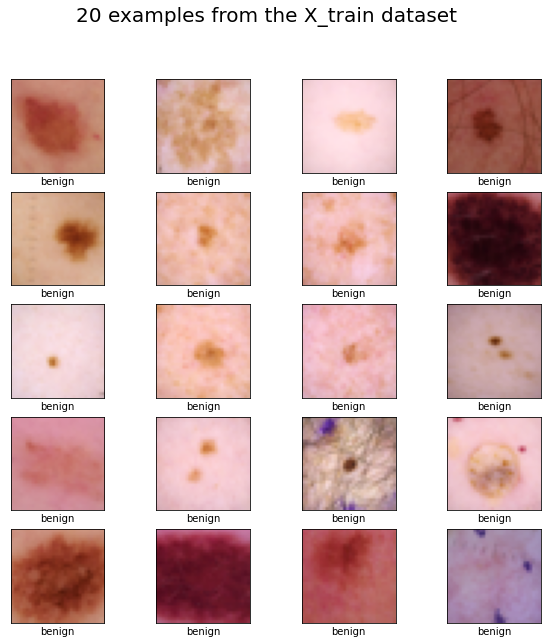

In [ ]:
display_examples(class_names, X_train, y_train)